# Customer Segmentation based on watch time

In [1]:
#Importing necessary packages

import pandas as pd #for dataframe
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np

In [2]:
df = pd.read_excel("train.xlsx") #importing dataset

In [3]:
df1 = df #copying the dataframe to another variable

In [4]:
df1.head() #head of the dataframe

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320"
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936..."
2,2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2..."
3,3,train-121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083"
4,4,train-121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6"


The dataset is from hotstar which is one of the biggest streaming site in India. Below is the information about the dataset:

- ID = Customer ID
- titles = titles of the shows watched by the user and watch_time on different titles in the format “title:watch_time” separated by comma, e.g. “JOLLY LLB:23, Ishqbaaz:40”. watch_time is in seconds
- genres = genre watched by the user and watch_time on different genre in the format “genre:watch_time” separated by comma, e.g. “Drama:6,Cricket:3469”. watch_time is in seconds
- cities = city in which user have watched and watch_time on different cities in the format “city:watch_time” separated by comma, e.g. “delhi:3492”. watch_time is in seconds
- tod = total watch time of the user spreaded across different time of days (24 hours format) in the format “time_of_day:watch_time” separated by comma, e.g. “1:454, “17”:5444”
- dow - total watch time of the user spreaded across different days of week (7 days format) in the format “day_of_week:watch_time” separated by comma, e.g. “1:454, “6”:5444”
- segment = consider them as interest segments. encode pos = 1, neg = 0

# Preparing and cleaning the data

As, in genre, dow and tow column, we have multiple value in each record. We will split the value and pivot every genre and these genre column will contain watch time and similarly, we will do the same for tow and dow. For the segmentation, we will only be focusing on genre, tod and dow. So we will be removing title and segment from the dataset.

## Preparing and cleaning genre column

In [5]:
#Spliting value in genre column with delimiter ,

genres = df1['genres'].str.split(',', expand=True).add_prefix('genres')

In [6]:
genres

,genres0,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,...,genres12,genres13,genres14,genres15,genres16,genres17,genres18,genres19,genres20,genres21
0,Drama:6,Cricket:3469,Wildlife:79,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Drama:48949,Family:9927,Crime:1901,Romance:16571,Action:2064,Comedy:4225,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Cricket:5715,Family:2777,Drama:20873,LiveTV:4,Action:14,Comedy:15,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Romance:77,Drama:122,Cricket:3883,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,TalkShow:8529,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Cricket:3787,Reality:57,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
199996,Cricket:5060,Awards:21,Crime:1872,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
199997,Drama:25428,Family:7,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
199998,Drama:50749,Romance:9,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
#Assigning only one genre in each row

df1 = df.assign(genres=df.genres.str.split(",")).explode('genres')
df1

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod
0,0,train-121672,Drama:6,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320"
0,0,train-121672,Cricket:3469,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320"
0,0,train-121672,Wildlife:79,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320"
1,1,train-121673,Drama:48949,"Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936..."
1,1,train-121673,Family:9927,"Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936..."
...,...,...,...,...,...,...,...,...
199999,199999,train-126328,Drama:14565,"India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928","11:3552,10:1290,13:4147,12:2604,15:2648,21:699..."
199999,199999,train-126328,LiveTV:1662,"India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928","11:3552,10:1290,13:4147,12:2604,15:2648,21:699..."
199999,199999,train-126328,Awards:640,"India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928","11:3552,10:1290,13:4147,12:2604,15:2648,21:699..."
199999,199999,train-126328,Action:41,"India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928","11:3552,10:1290,13:4147,12:2604,15:2648,21:699..."


In [8]:
#Spliting watch time from genre

df1 = df1.join(df1['genres'].str.split(':', expand=True).add_prefix('genres'))

df1['genres1'] = df1['genres1'].apply(pd.to_numeric)

In [9]:
df1

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod,genres0,genres1
0,0,train-121672,Drama:6,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",Drama,6
0,0,train-121672,Drama:6,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",Cricket,3469
0,0,train-121672,Drama:6,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",Wildlife,79
0,0,train-121672,Cricket:3469,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",Drama,6
0,0,train-121672,Cricket:3469,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",Cricket,3469
...,...,...,...,...,...,...,...,...,...,...
199999,199999,train-126328,Thriller:6,"India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928","11:3552,10:1290,13:4147,12:2604,15:2648,21:699...",Drama,14565
199999,199999,train-126328,Thriller:6,"India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928","11:3552,10:1290,13:4147,12:2604,15:2648,21:699...",LiveTV,1662
199999,199999,train-126328,Thriller:6,"India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928","11:3552,10:1290,13:4147,12:2604,15:2648,21:699...",Awards,640
199999,199999,train-126328,Thriller:6,"India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928","11:3552,10:1290,13:4147,12:2604,15:2648,21:699...",Action,41


In [10]:
#Making separating dataframe for genre and pivoting the it so that column would be according to the genre name

medals = df1.pivot_table('genres1', ['ID'], 'genres0')

In [11]:
medals

genres0,Action,Athletics,Awards,Badminton,Boxing,Comedy,Cricket,Crime,Documentary,Drama,...,Sport,Swimming,Table Tennis,TalkShow,Teen,Tennis,Thriller,Travel,Volleyball,Wildlife
ID,,,,,,,,,,,,,,,,,,,,,
train-1,NaN,NaN,NaN,NaN,NaN,NaN,82379.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train-10,NaN,NaN,NaN,NaN,NaN,NaN,15640.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730.0
train-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train-1000,NaN,NaN,NaN,NaN,NaN,NaN,7690.0,NaN,NaN,NaN,...,NaN,NaN,NaN,658.0,NaN,NaN,NaN,NaN,NaN,NaN
train-10000,NaN,NaN,NaN,NaN,NaN,NaN,3283.0,NaN,NaN,5503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train-99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3901.0,NaN,NaN,NaN,NaN,NaN,NaN
train-99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train-99997,NaN,NaN,NaN,NaN,NaN,NaN,18.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Joining the above dataframe in the original dataframe according to ID

df = df.join(medals, on='ID').fillna(0)

In [13]:
df.head()

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod,Action,Athletics,...,Sport,Swimming,Table Tennis,TalkShow,Teen,Tennis,Thriller,Travel,Volleyball,Wildlife
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",2064.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,train-121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,train-121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6",0.0,0.0,...,0.0,0.0,0.0,8529.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.head()

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod,Action,Athletics,...,Sport,Swimming,Table Tennis,TalkShow,Teen,Tennis,Thriller,Travel,Volleyball,Wildlife
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",2064.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,train-121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,train-121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6",0.0,0.0,...,0.0,0.0,0.0,8529.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing and cleaning dow

For day of the week, we will be doing the same as genre.

In [15]:
#Spliting value in day of the week column with delimiter ,

dow = df['dow'].str.split(',', expand=True).add_prefix('day')

In [16]:
dow

,day0,day1,day2,day3,day4,day5,day6
0,5:482,4:3008,7:64,None,None,None,None
1,1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:15493
2,1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800
3,1:77,2:3883,5:122,None,None,None,None
4,1:6150,3:2378,None,None,None,None,None
...,...,...,...,...,...,...,...
199995,1:1108,5:40,4:220,7:2472,None,None,None
199996,1:948,5:2317,7:3688,None,None,None,None
199997,1:2562,3:3153,2:5009,5:3875,4:4274,7:3284,6:3278
199998,1:11880,3:7673,2:17472,5:2759,4:5122,7:4836,6:1012


In [17]:


df1 = df.assign(dow=df.dow.str.split(",")).explode('dow')
df1

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod,Action,Athletics,...,Sport,Swimming,Table Tennis,TalkShow,Teen,Tennis,Thriller,Travel,Volleyball,Wildlife
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,5:482,"18:1372,21:1862,17:320",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,4:3008,"18:1372,21:1862,17:320",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,7:64,"18:1372,21:1862,17:320",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,1:3257,"11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",2064.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,3:9162,"11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",2064.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199999,199999,train-126328,"Cricket:17417,Reality:14947,Drama:14565,LiveTV...","India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,2:6421,"11:3552,10:1290,13:4147,12:2604,15:2648,21:699...",41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
199999,199999,train-126328,"Cricket:17417,Reality:14947,Drama:14565,LiveTV...","India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,5:4460,"11:3552,10:1290,13:4147,12:2604,15:2648,21:699...",41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
199999,199999,train-126328,"Cricket:17417,Reality:14947,Drama:14565,LiveTV...","India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,4:4157,"11:3552,10:1290,13:4147,12:2604,15:2648,21:699...",41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
199999,199999,train-126328,"Cricket:17417,Reality:14947,Drama:14565,LiveTV...","India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,7:7896,"11:3552,10:1290,13:4147,12:2604,15:2648,21:699...",41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0


In [18]:
df1 = df1.join(df1['dow'].str.split(':', expand=True).add_prefix('dow'))

df1['dow1'] = df1['dow1'].apply(pd.to_numeric)

In [19]:
medals = df1.pivot_table('dow1', ['ID'], 'dow0')

In [20]:
df = df.join(medals, on='ID').fillna(0)

In [21]:
df.head()

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod,Action,Athletics,...,Travel,Volleyball,Wildlife,1,2,3,4,5,6,7
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",0.0,0.0,...,0.0,0.0,79.0,0.0,0.0,0.0,3008.0,482.0,0.0,64.0
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",2064.0,0.0,...,0.0,0.0,0.0,3257.0,12893.0,9162.0,8503.0,9237.0,15493.0,25094.0
2,2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",14.0,0.0,...,0.0,0.0,0.0,40.0,4659.0,2700.0,6641.0,7338.0,5800.0,2218.0
3,3,train-121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083",0.0,0.0,...,0.0,0.0,0.0,77.0,3883.0,0.0,0.0,122.0,0.0,0.0
4,4,train-121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6",0.0,0.0,...,0.0,0.0,0.0,6150.0,0.0,2378.0,0.0,0.0,0.0,0.0


In [22]:
df = df.rename(columns = {"1": "Mon", "2": "Tue", "3":"Wed", "4": "Thu", "5": "Fri", "6": "Sat", "7": "Sun"
                         })

## Preparing and cleaning tod

For time of the day, we will be doing the same as genre and tod.

In [23]:
tod = df['tod'].str.split(',', expand=True).add_prefix('time')

In [24]:
tod

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time14,time15,time16,time17,time18,time19,time20,time21,time22,time23
0,18:1372,21:1862,17:320,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,11:7726,10:3521,13:2067,12:3844,20:4608,21:9360,17:5734,16:4438,19:3822,18:4274,...,2:9807,9:2005,15:967,14:2807,None,None,None,None,None,None
2,11:302,10:1594,13:331,12:133,20:3802,14:3083,22:2219,23:2111,19:3683,18:101,...,15:1640,21:3430,None,None,None,None,None,None,None,None
3,10:122,12:77,15:1800,14:0,16:2083,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,20:529,21:1257,22:4930,23:538,19:1268,18:6,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13:1108,15:17,17:209,22:40,16:11,19:128,21:2327,None,None,None,...,None,None,None,None,None,None,None,None,None,None
199996,13:1708,15:279,14:1,17:601,19:154,1:948,3:184,2:423,20:526,21:2128,...,None,None,None,None,None,None,None,None,None,None
199997,10:1237,13:968,12:1296,20:1120,14:4654,17:1595,16:2225,19:390,18:234,1:1245,...,15:387,21:1269,None,None,None,None,None,None,None,None
199998,10:1,13:9913,12:226,20:1837,14:5666,17:3892,16:5615,19:2987,18:5023,22:2650,...,21:993,None,None,None,None,None,None,None,None,None


In [25]:
df1 = df.assign(tod=df.tod.str.split(",")).explode('tod')
df1

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod,Action,Athletics,...,Travel,Volleyball,Wildlife,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64",18:1372,0.0,0.0,...,0.0,0.0,79.0,0.0,0.0,0.0,3008.0,482.0,0.0,64.0
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64",21:1862,0.0,0.0,...,0.0,0.0,79.0,0.0,0.0,0.0,3008.0,482.0,0.0,64.0
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64",17:320,0.0,0.0,...,0.0,0.0,79.0,0.0,0.0,0.0,3008.0,482.0,0.0,64.0
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...",11:7726,2064.0,0.0,...,0.0,0.0,0.0,3257.0,12893.0,9162.0,8503.0,9237.0,15493.0,25094.0
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...",10:3521,2064.0,0.0,...,0.0,0.0,0.0,3257.0,12893.0,9162.0,8503.0,9237.0,15493.0,25094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199999,199999,train-126328,"Cricket:17417,Reality:14947,Drama:14565,LiveTV...","India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928",20:4237,41.0,0.0,...,0.0,0.0,0.0,11425.0,6421.0,7989.0,4157.0,4460.0,6928.0,7896.0
199999,199999,train-126328,"Cricket:17417,Reality:14947,Drama:14565,LiveTV...","India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928",0:1289,41.0,0.0,...,0.0,0.0,0.0,11425.0,6421.0,7989.0,4157.0,4460.0,6928.0,7896.0
199999,199999,train-126328,"Cricket:17417,Reality:14947,Drama:14565,LiveTV...","India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928",9:1341,41.0,0.0,...,0.0,0.0,0.0,11425.0,6421.0,7989.0,4157.0,4460.0,6928.0,7896.0
199999,199999,train-126328,"Cricket:17417,Reality:14947,Drama:14565,LiveTV...","India vs Australia 2nd Test English:3222,India...",navi mumbai:49286,neg,"1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928",8:573,41.0,0.0,...,0.0,0.0,0.0,11425.0,6421.0,7989.0,4157.0,4460.0,6928.0,7896.0


In [26]:
df1 = df1.join(df1['tod'].str.split(':', expand=True).add_prefix('tod'))

df1['tod1'] = df1['tod1'].apply(pd.to_numeric)

In [27]:
medals = df1.pivot_table('tod1', ['ID'], 'tod0')

In [28]:
medals

tod0,0,1,10,11,12,13,14,15,16,17,...,21,22,23,3,4,5,6,7,8,9
ID,,,,,,,,,,,,,,,,,,,,,
train-1,NaN,NaN,26.0,NaN,323.0,331.0,2196.0,2901.0,1725.0,7953.0,...,16233.0,8894.0,5046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train-10,NaN,961.0,384.0,1661.0,NaN,NaN,NaN,1201.0,525.0,NaN,...,798.0,221.0,155.0,1617.0,NaN,305.0,NaN,NaN,241.0,374.0
train-100,2406.0,1207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train-1000,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1042.0,NaN,2288.0,NaN,NaN,NaN,NaN,NaN,658.0,NaN
train-10000,2395.0,NaN,NaN,NaN,NaN,NaN,NaN,1359.0,NaN,67.0,...,157.0,4139.0,1510.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train-99995,NaN,NaN,NaN,NaN,527.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train-99996,NaN,NaN,NaN,NaN,NaN,1814.0,504.0,2629.0,8161.0,11211.0,...,NaN,6795.0,6010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train-99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,...,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN


In [29]:
df = df.join(medals, on='ID').fillna(0)

In [30]:
df.head()

,Unnamed: 0,ID,genres,titles,cities,segment,dow,tod,Action,Athletics,...,21,22,23,3,4,5,6,7,8,9
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",0.0,0.0,...,1862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",2064.0,0.0,...,9360.0,304.0,2988.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
2,2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",14.0,0.0,...,3430.0,2219.0,2111.0,0.0,0.0,0.0,1874.0,504.0,201.0,4388.0
3,3,train-121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,train-121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6",0.0,0.0,...,1257.0,4930.0,538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will rename the column so that it's easier to understand

In [31]:
df = df.rename(columns = {"0" : "00.00","1": "01.00", "2": "02.00", "3":"03.00","4":"04.00","5":"05.00","6":"06.00"
                       ,"7":"07.00","8": "08.00", "9":"09.00","10":"10.00","11":"11.00", "12": "12.00", "13": "13.00",
                       "14": "14.00", "15":"15.00", "16": "16.00", "17": "17.00", "18": "18.00", "19": "19.00", "20":"20.00",
                       "21":"21.00","22":"22.00","23":"23.00"})

We will be dropping the dow, tod and genres dataset which we have already prepared and cleaned and remove title and segment column which won't be using in the clustering model

In [32]:
df = df.drop(['dow','tod','Unnamed: 0','genres','titles','cities','segment','NA'], axis = 1)

In [33]:
df.head()

,ID,Action,Athletics,Awards,Badminton,Boxing,Comedy,Cricket,Crime,Documentary,...,21.00,22.00,23.00,03.00,04.00,05.00,06.00,07.00,08.00,09.00
0,train-121672,0.0,0.0,0.0,0.0,0.0,0.0,3469.0,0.0,0.0,...,1862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train-121673,2064.0,0.0,0.0,0.0,0.0,4225.0,0.0,1901.0,0.0,...,9360.0,304.0,2988.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
2,train-121670,14.0,0.0,0.0,0.0,0.0,15.0,5715.0,0.0,0.0,...,3430.0,2219.0,2111.0,0.0,0.0,0.0,1874.0,504.0,201.0,4388.0
3,train-121671,0.0,0.0,0.0,0.0,0.0,0.0,3883.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train-121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1257.0,4930.0,538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df.columns

Index(['ID', 'Action', 'Athletics', 'Awards', 'Badminton', 'Boxing', 'Comedy',
       'Cricket', 'Crime', 'Documentary', 'Drama', 'Family', 'Football',
       'Formula1', 'FormulaE', 'Hockey', 'Horror', 'IndiaVsSa', 'Kabaddi',
       'Kids', 'LiveTV', 'Mythology', 'Reality', 'Romance', 'Science', 'Sport',
       'Swimming', 'Table Tennis', 'TalkShow', 'Teen', 'Tennis', 'Thriller',
       'Travel', 'Volleyball', 'Wildlife', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri',
       'Sat', 'Sun', '00.00', '01.00', '10.00', '11.00', '12.00', '13.00',
       '14.00', '15.00', '16.00', '17.00', '18.00', '19.00', '02.00', '20.00',
       '21.00', '22.00', '23.00', '03.00', '04.00', '05.00', '06.00', '07.00',
       '08.00', '09.00'],
      dtype='object')

As there are few column with space in between it's name, we will be removing those spaces.

In [35]:
df.columns = df.columns.str.replace(' ', '') 

In [36]:
df.shape

(200000, 66)

# Feature Engineering

Here we will be removing string from the 'ID' and extract only numeric and convert into integer.

In [37]:
import re as re

def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

df['ID']=df['ID'].apply(lambda x: find_number(x))
df['ID'] = df['ID'].astype('int32')

Now, we will group days into weekday and weekend. Similarly, we will group hours into morning, day and night.

In [38]:
df['weekday'] = df[['Mon', 'Tue', 'Wed',
       'Thu', 'Fri']].sum(axis=1)

df['weekend'] = df[['Sat','Sun']].sum(axis=1)

df['morning'] = df[['03.00', '04.00','05.00','06.00', '07.00', '08.00', '09.00', '10.00', '11.00']].sum(axis = 1)

df['day'] = df[['12.00',
       '13.00', '14.00', '15.00', '16.00', '17.00', '18.00']].sum(axis=1)

df['night'] = df[['00.00', '01.00', '02.00',
       '19.00', '20.00',
       '21.00', '22.00', '23.00']].sum(axis = 1)

df.head()

,ID,Action,Athletics,Awards,Badminton,Boxing,Comedy,Cricket,Crime,Documentary,...,05.00,06.00,07.00,08.00,09.00,weekday,weekend,morning,day,night
0,121672,0.0,0.0,0.0,0.0,0.0,0.0,3469.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3490.0,64.0,0.0,1692.0,1862.0
1,121673,2064.0,0.0,0.0,0.0,0.0,4225.0,0.0,1901.0,0.0,...,0.0,0.0,0.0,0.0,2005.0,43052.0,40587.0,13252.0,24131.0,46252.0
2,121670,14.0,0.0,0.0,0.0,0.0,15.0,5715.0,0.0,0.0,...,0.0,1874.0,504.0,201.0,4388.0,21378.0,8018.0,8863.0,5288.0,15245.0
3,121671,0.0,0.0,0.0,0.0,0.0,0.0,3883.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4082.0,0.0,122.0,3960.0,0.0
4,121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8528.0,0.0,0.0,6.0,8522.0


After grouping day and hour, we doesn't need all day of the week column and hour column. So we will be dropping those from the dataframe.

In [39]:
df = df.fillna(0)

In [40]:
df = df.drop(['Mon', 'Tue', 'Wed', 'Thu', 'Fri',
       'Sat', 'Sun', '00.00', '01.00', '02.00', '03.00', '04.00', '05.00',
       '06.00', '07.00', '08.00', '09.00', '10.00', '11.00', '12.00', '13.00',
       '14.00', '15.00', '16.00', '17.00', '18.00', '19.00', '20.00', '21.00',
       '22.00', '23.00'], axis = 1)

# Duplicate Values

Here we are checking if there is any duplicate values in customer id.

In [41]:
df['ID'].nunique()

200000

# Data Insights

In this section, we will be making a few graphs to explore the data.

In [42]:
# Data insight

genre_col = ['Action', 'Athletics', 'Awards', 'Badminton', 'Boxing', 'Comedy',
       'Cricket', 'Crime', 'Documentary', 'Drama', 'Family', 'Football',
       'Formula1', 'FormulaE', 'Hockey', 'Horror', 'IndiaVsSa', 'Kabaddi',
       'Kids', 'LiveTV', 'Mythology', 'Reality', 'Romance', 'Science',
       'Sport', 'Swimming', 'TableTennis', 'TalkShow', 'Teen', 'Tennis',
       'Thriller', 'Travel', 'Volleyball', 'Wildlife']

sum_genre = df[genre_col].sum(axis = 0)

<AxesSubplot:>

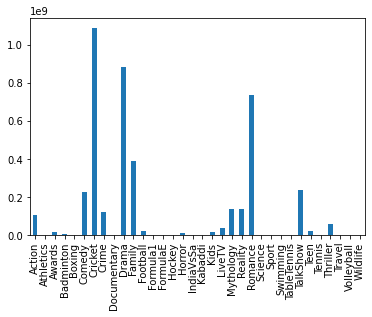

In [43]:
sum_genre.plot(kind='bar')

We can see from the bar graph, cricket has the highest watch time while drama has the second highest watch time followed by romance.

In [44]:
week_col = ['weekday','weekend']

sum_week = df[week_col].sum(axis = 0)

<AxesSubplot:>

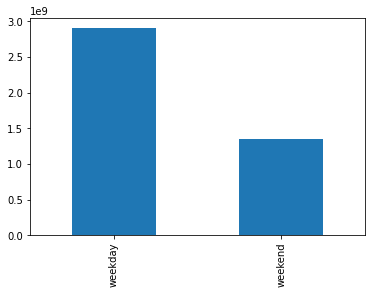

In [45]:
sum_week.plot(kind='bar')

From the above graph, weekday has highest watchtime compared to weekend but if weekday contains five days of the week but weekend contains only two so we can say people on weekend mostly spend their time on hotstar compared to days on weekdays

In [46]:
day_col = ['morning','day','night']

sum_day = df[day_col].sum(axis = 0)

<AxesSubplot:>

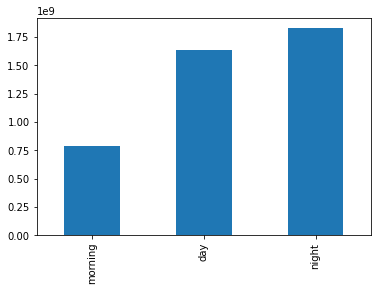

In [47]:
sum_day.plot(kind = 'bar')

From the above graph, customers watch hotstar mostly at night and morning has the lowest number of watch time.

# Checking outliers

In this section, we will be checking for outliers and remove them for better prediction.

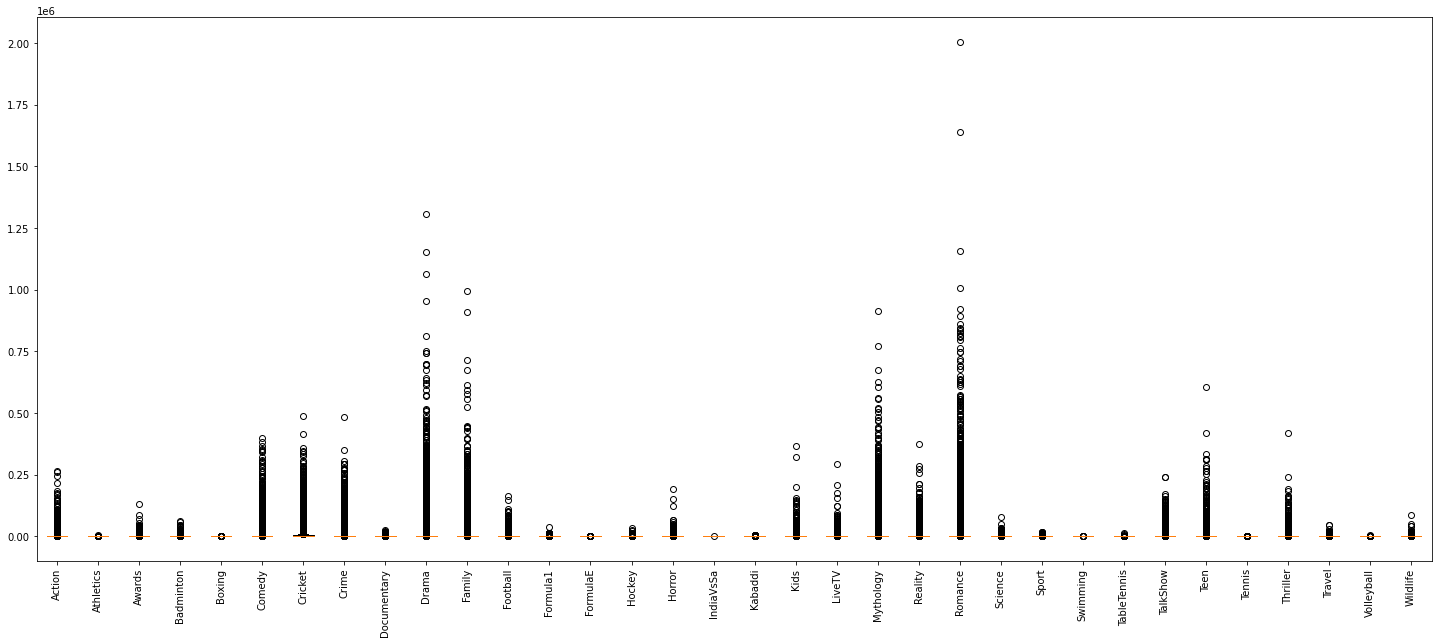

In [48]:
fig, axes = plt.subplots(figsize=(25, 10)) 
 
bplot = axes.boxplot(df[genre_col], labels = genre_col) 
 
plt.xticks(rotation = 90); 

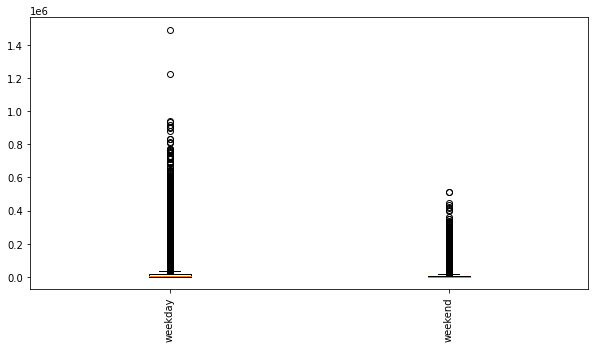

In [49]:
fig, axes = plt.subplots(figsize=(10, 5)) 
 
bplot = axes.boxplot(df[week_col], labels = week_col) 
 
plt.xticks(rotation = 90); 

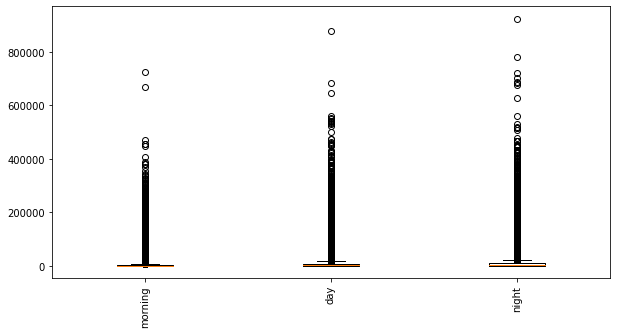

In [50]:
fig, axes = plt.subplots(figsize=(10, 5))

bplot = axes.boxplot(df[day_col], labels = day_col) 
 
plt.xticks(rotation = 90); 

As we can see from the above, boxplot there are many outliers in the dataset. So we will calculate the z-score and only select the z-scores that is less than 3 to normalize the data

In [51]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.37536139 0.16185059 0.01607123 ... 0.30846142 0.32329153 0.34137548]
 [0.37537871 0.45908845 0.01607123 ... 0.73393287 0.79506886 1.73936838]
 [0.37532675 0.1576388  0.01607123 ... 0.38869679 0.14406679 0.28594137]
 ...
 [0.45597104 0.16185059 0.01607123 ... 0.48222281 0.15851202 0.24003355]
 [0.456023   0.16185059 0.01607123 ... 0.30838276 1.27687241 0.36609618]
 [0.45600568 0.14951605 0.01607123 ... 0.22296145 0.78470213 0.4429698 ]]


In [52]:
df_clean = df[(z < 3).all(axis=1)]

In [53]:
df.shape

(200000, 40)

In [54]:
df_clean.shape

(171585, 40)

After normalizing the data, we only have 171585 rows.

# Scaling the data

As we have already removed the outliers, we will use minmax scaler to normalize the data. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

In [55]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_df = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
scaled_df

,ID,Action,Athletics,Awards,Badminton,Boxing,Comedy,Cricket,Crime,Documentary,...,Tennis,Thriller,Travel,Volleyball,Wildlife,weekday,weekend,morning,day,night
0,0.608356,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.072704,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.080366,0.031102,0.001256,0.000000,0.024842,0.025475
1,0.608361,0.196478,0.0,0.000000,0.0,0.0,0.179322,0.000000,0.099921,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.383670,0.796276,0.315171,0.354289,0.632792
2,0.608346,0.001333,0.0,0.000000,0.0,0.0,0.000637,0.119776,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.190516,0.157305,0.210788,0.077638,0.208573
3,0.608351,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.081381,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.036378,0.000000,0.002902,0.058140,0.000000
4,0.608376,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.076000,0.000000,0.000000,0.000088,0.116593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171580,0.631616,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.079369,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.012191,0.048498,0.000000,0.019747,0.034135
171581,0.631631,0.000000,0.0,0.006701,0.0,0.0,0.000000,0.106049,0.098397,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.029097,0.072355,0.004376,0.038011,0.057175
171582,0.631626,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.168192,0.128740,0.239066,0.166772,0.055054
171583,0.631641,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.400192,0.114732,0.000024,0.496219,0.231968


# Splitting dataframe

We will go customer segmentation using genre, week and time of day. So we will be separating the orignal dataframe into three dataframe that will be separate genre dataframe, week dataframe and time dataframe.

In [56]:
genre_df = scaled_df.iloc[:,0:35] 

In [57]:
genre_df.columns

Index(['ID', 'Action', 'Athletics', 'Awards', 'Badminton', 'Boxing', 'Comedy',
       'Cricket', 'Crime', 'Documentary', 'Drama', 'Family', 'Football',
       'Formula1', 'FormulaE', 'Hockey', 'Horror', 'IndiaVsSa', 'Kabaddi',
       'Kids', 'LiveTV', 'Mythology', 'Reality', 'Romance', 'Science', 'Sport',
       'Swimming', 'TableTennis', 'TalkShow', 'Teen', 'Tennis', 'Thriller',
       'Travel', 'Volleyball', 'Wildlife'],
      dtype='object')

In [58]:
week_df = scaled_df.iloc[:,[0,35,36]] 

In [59]:
week_df.columns

Index(['ID', 'weekday', 'weekend'], dtype='object')

In [60]:
time_df = scaled_df.iloc[:,[0,37,38,39]] 

In [61]:
time_df.columns

Index(['ID', 'morning', 'day', 'night'], dtype='object')

# Performing cluster analysis using K-means

In [115]:
X3 = scaled_df #Storing the dataframe for the further use

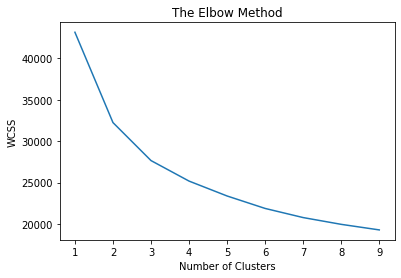

In [116]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow graph, we can see, the graph makes elbow at k = 2. So we will be choosing 2 as number of clusters.

In [138]:
# Fitting K Means to the Datatset using k = 2

kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(X3)

In [139]:
scaled_df['Cluster_ID'] = y_kmeans

In [140]:
sample_df = df_clean.sample(n = 1000)

# Visualizing the clusters 

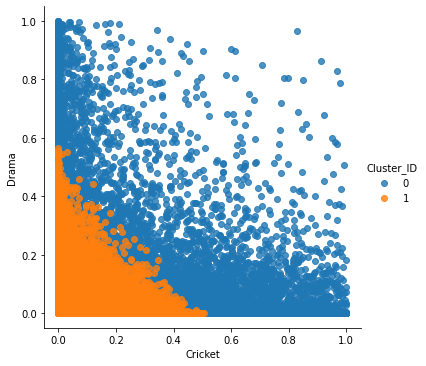

In [141]:
facet = sns.lmplot(data=scaled_df, x='Cricket', y='Drama', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

For the genre, we can see from graph, cluster 1 of customers watch both Drama and cricket alot and cluster 2 customers watch both but less than cluster 1.

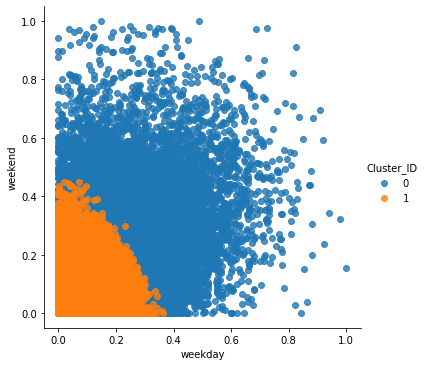

In [142]:
facet = sns.lmplot(data=scaled_df, x='weekday', y='weekend', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)


From the graph, we notice that cluster 1 customers watch alot in both weekdays and weekends and cluster 2 customers have less number of watch time compared to cluster 1 customers.

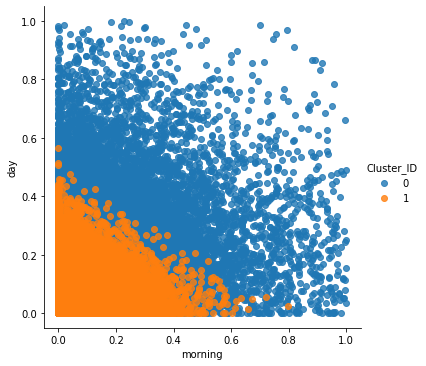

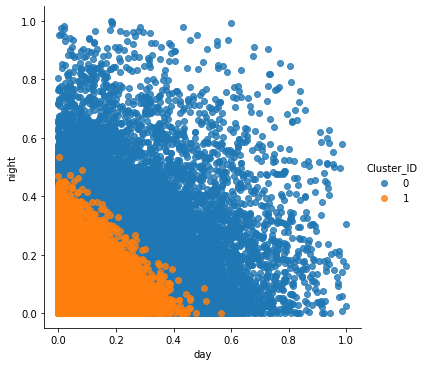

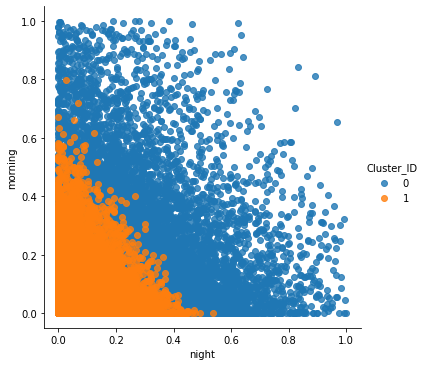

In [143]:
facet = sns.lmplot(data=scaled_df, x='morning', y='day', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=scaled_df, x='day', y='night', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=scaled_df, x='night', y='morning', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)



From the above graph, we can see, cluster 1 customers have higher number of watch time in every graph compared to customers of cluster 2.

In [144]:
for i in range(4): X3_mean= scaled_df.groupby(['Cluster_ID']).mean()

X3_mean

,ID,Action,Athletics,Awards,Badminton,Boxing,Comedy,Cricket,Crime,Documentary,...,Tennis,Thriller,Travel,Volleyball,Wildlife,weekday,weekend,morning,day,night
Cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,0.297512,0.024394,0.000118,0.005137,0.003727,1.989126e-05,0.018598,0.107162,0.010724,0.000392,...,0.000142,0.013699,0.002155,0.000010,0.002367,0.077357,0.084154,0.050155,0.072148,0.081357
1,0.744039,0.019558,0.000046,0.005304,0.002908,6.797912e-07,0.018115,0.041517,0.009370,0.000474,...,0.000113,0.010328,0.003530,0.000005,0.003403,0.040304,0.040262,0.026817,0.038260,0.038872


# Conclusion

After customer segmentation, we can target those customers who are watching a lot and provide various services and content so that they will be have high number of watch time in the future as well while for those customers who have less watch time, we can provide discount and offer to increase their watch time.